**[LeetCode Link](https://leetcode-cn.com/problems/kth-smallest-element-in-a-bst/solution/er-cha-sou-suo-shu-zhong-di-kxiao-de-yuan-su-by-le/)**

**[LeetCode Link](https://leetcode-cn.com/problems/kth-smallest-element-in-a-bst/solution/xiang-xi-tong-su-de-si-lu-fen-xi-duo-jie-fa-by--48/)**

## 递归
通过构造 BST 的中序遍历序列，则第 k-1 个元素就是第 k 小的元素。
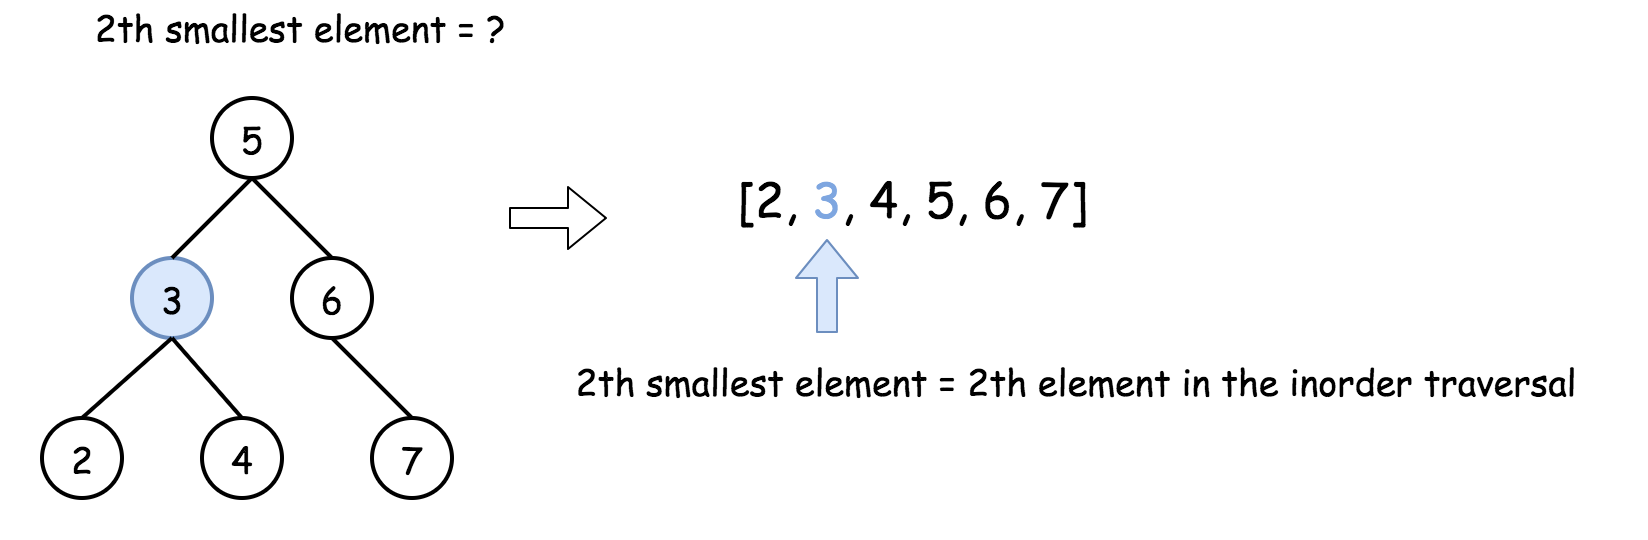

### 复杂度分析
* 时间复杂度：$\mathcal{O}(N)$，遍历了整个树。
* 空间复杂度：$\mathcal{O}(N)$，用了一个数组存储中序序列。

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        def inorder(r):
            return inorder(r.left) + [r.val] + inorder(r.right) if r else []
    
        return inorder(root)[k - 1]

## 迭代

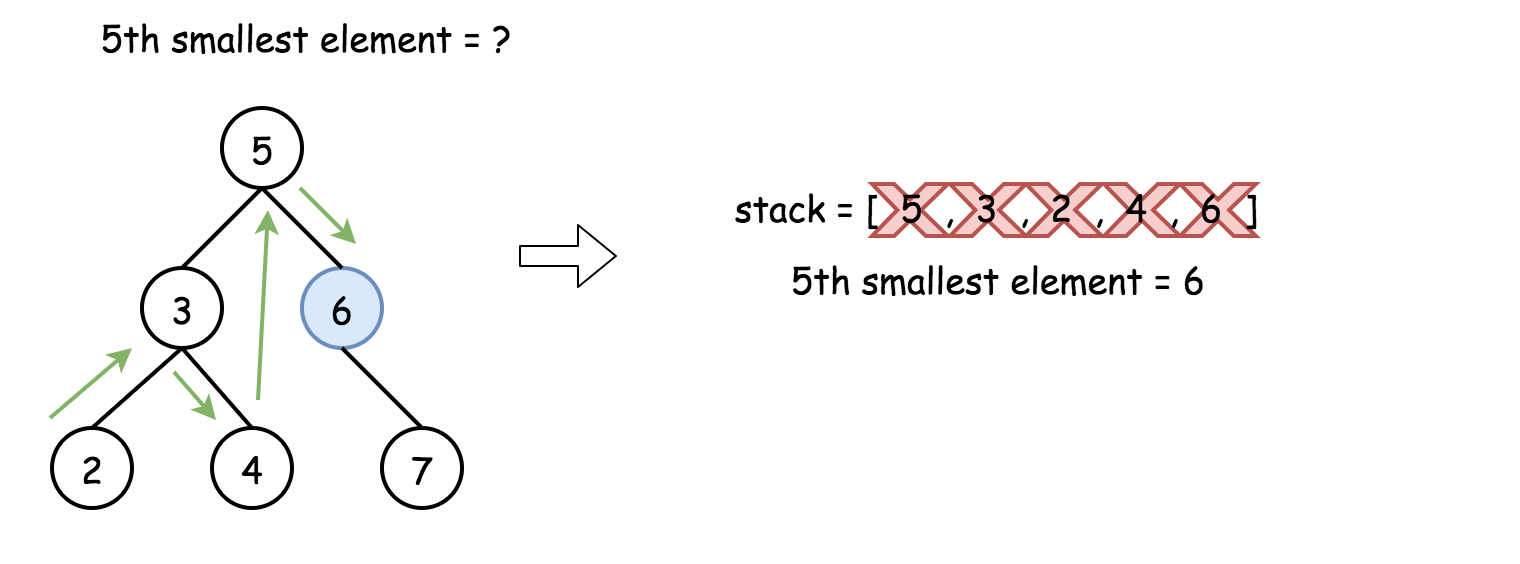

### 复杂度分析
* 时间复杂度：$\mathcal{O}(H+k)$，其中 H 指的是树的高度，由于我们开始遍历之前，要先向下达到叶，当树是一个平衡树时：复杂度为 $\mathcal{O}(\log N+k)$。当树是一个不平衡树时：复杂度为 $\mathcal{O}(N+k)$，此时所有的节点都在左子树。
* 空间复杂度：$\mathcal{O}(H+k)$。当树是一个平衡树时：$\mathcal{O}(\log N+k)$。当树是一个非平衡树时：$\mathcal{O}(N+k)$。

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        """
        :type root: TreeNode
        :type k: int
        :rtype: int
        """
        stack = []
        
        while True:
            while root:
                stack.append(root)
                root = root.left
            root = stack.pop()
            k -= 1
            if not k:
                return root.val
            root = root.right

## 分治法
**我们只需要先计算左子树的节点个数，记为 n，然后有三种情况：**
* n 加 1 等于 k，那就说明当前根节点就是我们要找的。
* n 加 1 小于 k，那就说明第 k 小的数一定在右子树中，我们只需要递归的在右子树中寻找第 k - n - 1 小的数即可。
* n 加 1 大于 k，那就说明第 k 小个数一定在左子树中，我们只需要递归的在左子树中寻找第 k 小的数即可。

In [ ]:
class Solution:
    def kthSmallest(self, root, k):
        n = self.nodenum(root.left)
        if n + 1 == k: return root.val
        if n + 1 < k: return kthSmallest(root.right, k-n-1)
        else: return kthSmallest(root.left, k)
        
    def nodenum(self, root):
        if not root: return 0
        return 1 + self.nodenum(root.left) + self.nodenum(root.right)